In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan_train = pd.read_csv("loan-train.csv")
loan_test = pd.read_csv("loan-test.csv")

In [3]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# finding numbers of columns and rows in the dataset

print("Number of columns in the dataset are ",loan_train.shape[1])
print("Number of rows in the dataset are ",loan_train.shape[0])

Number of columns in the dataset are  13
Number of rows in the dataset are  614


In [5]:
# printing all the columns names

loan_train_col = loan_train.columns
print("columns in the dataset are : ")
loan_train_col

columns in the dataset are : 


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# based on the above output we can see that there are some missing values in the dataset.
# so let us find out how many missing values are there in the dataset.

In [9]:
loan_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
loan_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
loan_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
loan_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
loan_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
loan_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
loan_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [16]:
loan_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
# finding number of null values in each columns

loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# filling the null values in the dataset

In [19]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0],inplace=True)

In [20]:
loan_train['Married'].fillna(loan_train['Married'].mode()[0],inplace=True)

In [21]:
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0],inplace=True)

In [22]:
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0],inplace=True)

In [23]:
# as loan amount is a numeric data we will fill the data with the mean of the data
# and also the data is right tailed data we need to tranfrom it into normal form using log transformation

<AxesSubplot:ylabel='Frequency'>

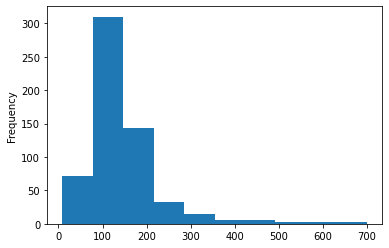

In [24]:
loan_train['LoanAmount'].plot(kind='hist')

In [25]:
loan_train.LoanAmount = loan_train.LoanAmount.fillna(loan_train.LoanAmount.mean())

In [26]:
loan_train['LoanAmount_log'] = np.log(loan_train['LoanAmount'])

<AxesSubplot:ylabel='Frequency'>

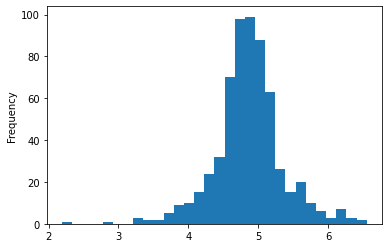

In [27]:
loan_train['LoanAmount_log'].plot(kind='hist',bins=30)

In [28]:
# so from above graph we can say that our data is in normal form
# after applying log transformation let us check the output whether the graph is in normal form or not

In [29]:
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0],inplace=True)

In [30]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0],inplace=True)

In [31]:
# all the null values arefilled 
# now let us check whether any null value is now present or not

In [32]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [33]:
# from above result we can say that no null value is present in the dataset
# here ApplicantIncome $ CoapplicantIncome is also right skwed as we can see in below graph . so we also need to normalize this.

<AxesSubplot:ylabel='Frequency'>

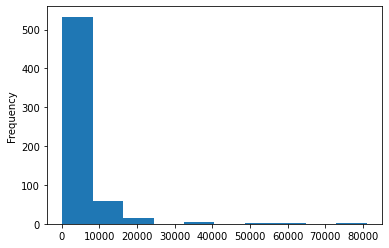

In [37]:
loan_train['ApplicantIncome'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

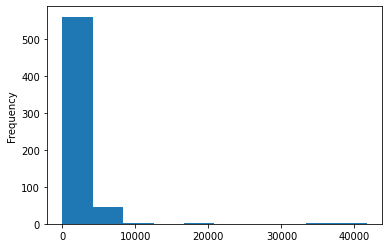

In [38]:
loan_train['CoapplicantIncome'].plot(kind='hist')

In [39]:
loan_train['total_income'] = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']
loan_train['total_income_log'] = np.log(loan_train['total_income'])

<AxesSubplot:ylabel='Frequency'>

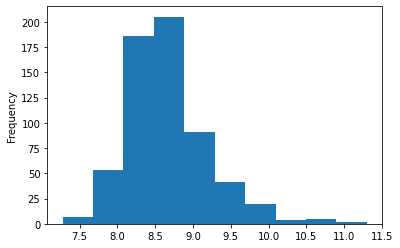

In [40]:
loan_train['total_income_log'].plot(kind='hist')

In [41]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,total_income,total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [ ]:
x = loan_train.iloc[:,np.r_[1:5,9:11,13:15]].values   # independent variables
y = loan_train.iloc[:,12].values # dependent variables

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_x = LabelEncoder()
for i in range(0,5):
    x_train[:,i] = le_x.fit_transform(x_train[:,i])

In [ ]:
x_train[:,7] = le_x.fit_transform(x_train[:,7])

In [ ]:
x_train

In [ ]:
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)

In [ ]:
y_train

In [ ]:
le_x = LabelEncoder()
for i in range(0,5):
    x_test[:,i] = le_x.fit_transform(x_test[:,i])


In [ ]:
x_test[:,7] = le_x.fit_transform(x_test[:,7])

In [ ]:
x_test

In [ ]:
le_y = LabelEncoder()
y_test = le_y.fit_transform(y_test)

In [ ]:
y_test

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtclassifier = DecisionTreeClassifier(criterion ='entropy',random_state=0)
dtclassifier.fit(x_train,y_train)

In [ ]:
y_pred = dtclassifier.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('the accuracy of decision tree classifier is : ',accuracy_score(y_pred,y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

In [ ]:
y_pred = lr.predict(x_test)
y_pred

In [ ]:
print('the accuracy of logistic regression  classifier is : ',accuracy_score(y_pred,y_test))

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)

In [ ]:
y_pred = nb.predict(x_test)
y_pred

In [ ]:
print('the accuracy of navie bayes classifier is : ',accuracy_score(y_pred,y_test))

In [ ]:
test_data = pd.read_csv("loan-test.csv")

In [ ]:
test_data.head()

In [ ]:
test_data.info()

In [ ]:
test_data.isnull().sum()

In [ ]:
# filling the missing values

In [ ]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)

In [ ]:
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0],inplace=True)

In [ ]:
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0],inplace=True)

In [ ]:
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace=True)

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data['LoanAmount'].plot(kind='box')

In [ ]:
test_data['ApplicantIncome'].plot(kind='box')

In [ ]:
test_data.LoanAmount = test_data.LoanAmount.fillna(test_data.LoanAmount.mean())

In [ ]:
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data['total_income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['total_income_log'] = np.log(test_data['total_income'])

In [ ]:
test = test_data.iloc[:,np.r_[1:5,9:11,13:15]].values
for i in range(0,5):
    test[:,i] = le_x.fit_transform(test[:,i])
test[:,7] = le_x.fit_transform(test[:,7])

In [ ]:
test

In [ ]:
test = ss.fit_transform(test)

In [ ]:
pred = nb.predict(test)
pred